In [6]:
##dataset loading


import pandas as pd

df = pd.read_csv("data/spam.csv", encoding="latin-1")
df = df[['v1', 'v2']]
df.columns = ['label', 'message']

df.head()



,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
## Text Preprocessing

df['label'] = df['label'].map({
    'spam': 'scam',
    'ham': 'safe'
})


In [20]:
import re
import string

def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+|www\S+', '', text)
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.strip()
    df['clean_message'] = df['message'].apply(clean_text)
    df.head()



In [22]:
## TF-IDF Vectorization

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
X = df['clean_message']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2))

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)



In [12]:
## Model Training and prediction

from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)
y_pred = model.predict(X_test_tfidf)
y_pred[:10]



array(['safe', 'safe', 'safe', 'scam', 'safe', 'safe', 'safe', 'safe',
       'safe', 'safe'], dtype='<U4')

In [14]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
accuracy
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
cm


              precision    recall  f1-score   support

        safe       0.96      1.00      0.98       966
        scam       1.00      0.75      0.86       149

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



array([[966,   0],
       [ 37, 112]])

Matplotlib is building the font cache; this may take a moment.


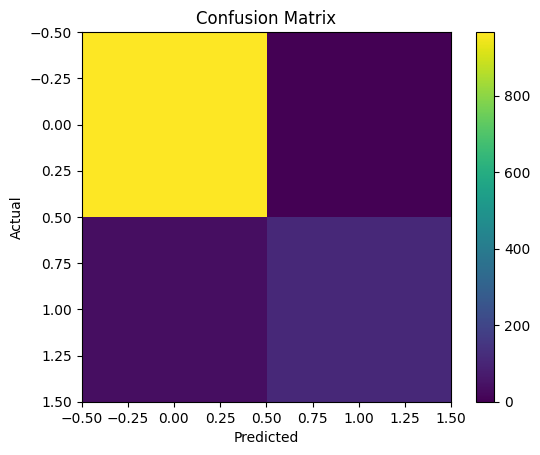

In [15]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(cm)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.colorbar()
plt.show()


In [19]:
## Testing with Custom Messages
sample_messages = [
    "You have won ₹50,000. Click the link now",
    "Your bank account will be blocked today",
    "Hey are we meeting at 6 pm?",
    "Please send the assignment by tonight"
]
clean_samples = [clean_text(msg) for msg in sample_messages]
clean_samples
sample_tfidf = tfidf.transform(clean_samples)
predictions = model.predict(sample_tfidf)
for msg, pred in zip(sample_messages, predictions):
    print(f"Prediction: {pred.upper()}")
    print(f"Message: {msg}")
    print("-" * 50)



Prediction: SCAM
Message: You have won ₹50,000. Click the link now
--------------------------------------------------
Prediction: SAFE
Message: Your bank account will be blocked today
--------------------------------------------------
Prediction: SAFE
Message: Hey are we meeting at 6 pm?
--------------------------------------------------
Prediction: SAFE
Message: Please send the assignment by tonight
--------------------------------------------------
